<h1 style = "font-size:3rem;color:darkcyan"> Discrete Fourier Transform </h1>

Fourier Transform: 
$\hat{g}(f) = \int_{-\infty}^{\infty} g(t) \cdot e^{-2 \pi i f t} dt$

In discrete time (DFT): 
$\hat{x}(k / N) = \sum_{n = 0}^{N-1} x(n) \cdot e^{-2 \pi i n \frac{k}{N}} $,

with,

frequency bin $k$ and number of samples $N$

Notes:
- Number of frequency bins = number of samples, easy transformation between time and frequency domain
- To increase frequency resolution a signal can be zero-padded


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

2250

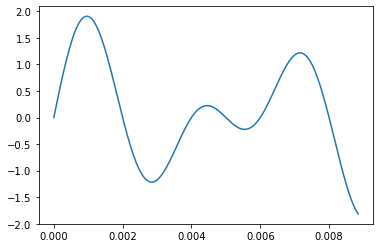

In [102]:
# create signal
sr = 22500
dur = 0.1 # 100 ms
t = np.arange(0, dur , 1/sr)
x = np.sin(2*np.pi*200*t) + np.sin(2*np.pi*300*t)
plt.plot(t[:200], x[:200])

len(x)

In [103]:
# simple inefficient DFT
def DFT(x):
    N = len(x)
    n_fft = len(x)

    X = np.zeros(n_fft, dtype = 'complex_')
    
    for i in range(0, n_fft): # go through all frequency bins
        for n in range(0, N): # go through all samples
            X[i] = X[i] + x[n] * np.exp(- 2 * np.pi * 1j * n * i / N)
        #print(f'done segment {i} of {N}')
            
    return X

In [104]:
N = len(x)
X = DFT(x)

Text(0, 0.5, 'Magnitude')

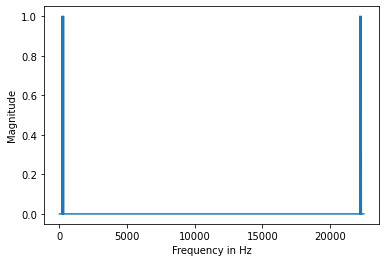

In [105]:
# plot magnitude
freq_axis = np.linspace(0, sr , N)
X_mag = 2 * abs(X) / N
plt.plot(freq_axis, X_mag)
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude')
# see redundancy in the graph

Text(0, 0.5, 'Magnitude')

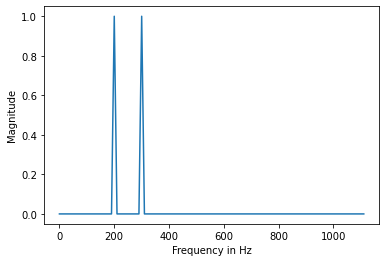

In [106]:
# zoom in:
plt.plot(freq_axis[:N//20], X_mag[:N//20])
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude')


Previous method is really slow, thus Fast Fourier Transform is used 

Text(0, 0.5, 'Magnitude')

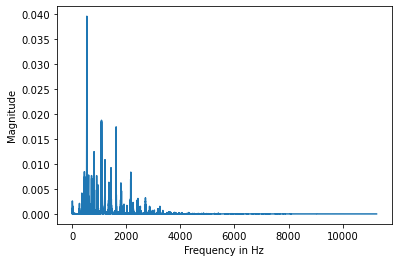

In [108]:
x , sample_rate = librosa.load('../samples/Trumpet.wav')
N = len(x)
freq_axis = np.linspace(0, sr , N)
X_mag = 2 * abs(np.fft.fft(x)) / N
plt.plot(freq_axis[:N//2], X_mag[:N//2])
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude')